In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
cases = pd.read_csv("covid_confirmed_usafacts.csv")
deaths = pd.read_csv("covid_deaths_usafacts.csv")

In [21]:
start_date= '2020-07-06'
end_date= '2020-12-27'

In [22]:
date_columns = cases.columns[(cases.columns >= start_date) & (cases.columns <= end_date)]


In [23]:
weekly_mean= pd.DataFrame()
weekly_median=pd.DataFrame()
weekly_mode=pd.DataFrame()
weekly_mean1= pd.DataFrame()
weekly_median1=pd.DataFrame()
weekly_mode1=pd.DataFrame()

In [24]:
for i in range(0, len(date_columns), 7):
    week_start = i
    week_end = min(i + 7, len(date_columns))
    current_week_columns = date_columns[week_start:week_end]
    #cases[f'Week_{i//7 + 1}'] = pd.cut(cases.index, bins=pd.to_datetime([start_date, end_date]), labels=False, right=False)
   
    weekly_mean[f'Mean_W_c{i//7 + 1}'] = cases[current_week_columns].mean(axis=1)
    weekly_median[f'Median_W_c{i//7 + 1}'] = cases[current_week_columns].median(axis=1)
    weekly_mode[f'Mode_W_c{i//7 + 1}'] = cases[current_week_columns].mode(axis=1).iloc[:, 0]
    
    weekly_mean1[f'Mean_W_d{i//7 + 1}'] = deaths[current_week_columns].mean(axis=1)
    weekly_median1[f'Median_W_d{i//7 + 1}'] = deaths[current_week_columns].median(axis=1)
    weekly_mode1[f'Mode_W_d{i//7 + 1}'] = deaths[current_week_columns].mode(axis=1).iloc[:, 0]


In [26]:
#weekly_mean

In [27]:
#weekly_median

In [36]:
#weekly_mode

In [29]:
#weekly_mean1

In [30]:
#weekly_median1

In [37]:
# weekly_mode1

In [32]:
mean_columns = weekly_mean.mean(axis=0)
median_columns=weekly_median.median(axis=0)
mode_columns=weekly_mode.mode(axis=0).iloc[0, :]
mean_columns1= weekly_mean1.mean(axis=0)
median_columns1=weekly_median1.median(axis=0)
mode_columns1=weekly_mode1.mode(axis=0).iloc[0, :]

In [42]:
#median_columns

In [43]:
#median_columns1

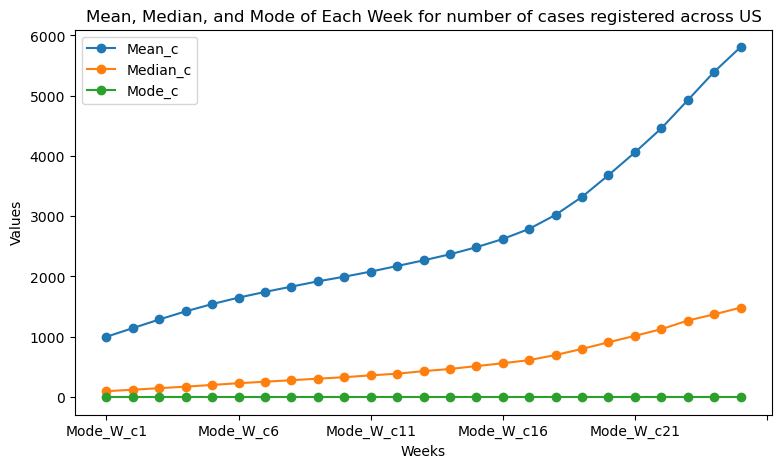

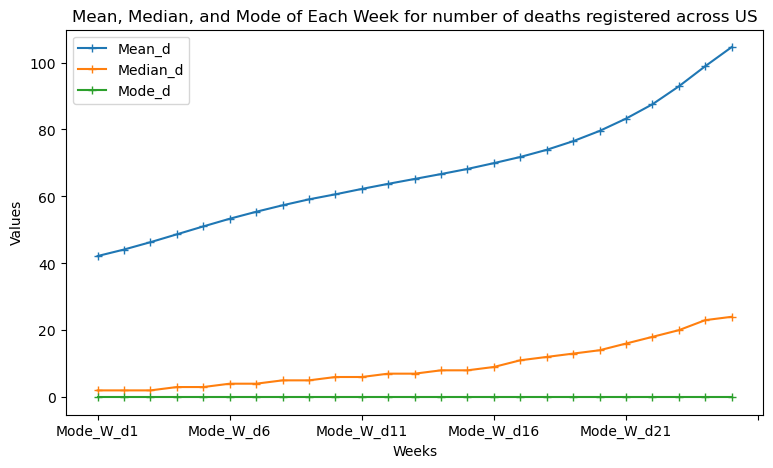

In [44]:
fig, ax = plt.subplots(figsize=(9,5))

mean_columns .filter(like='Mean').plot(ax=ax, linestyle='-', marker='o', label='Mean_c')
median_columns.filter(like='Median').plot(ax=ax, linestyle='-', marker='o', label='Median_c')
mode_columns.filter(like='Mode').plot(ax=ax, linestyle='-', marker='o', label='Mode_c')
ax.set_title('Mean, Median, and Mode of Each Week for number of cases registered across US')
ax.set_xlabel('Weeks')
ax.set_ylabel('Values')
ax.legend()

fig, ax = plt.subplots(figsize=(9,5))

mean_columns1 .filter(like='Mean').plot(ax=ax, linestyle='-', marker='+', label='Mean_d')
median_columns1.filter(like='Median').plot(ax=ax, linestyle='-', marker='+', label='Median_d')
mode_columns1.filter(like='Mode').plot(ax=ax, linestyle='-', marker='+', label='Mode_d')
ax.set_title('Mean, Median, and Mode of Each Week for number of deaths registered across US')
ax.set_xlabel('Weeks')
ax.set_ylabel('Values')
ax.legend()
plt.show()